<a href="https://colab.research.google.com/github/mohorka/ML_algorithms/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import pandas as pd
import warnings

In [3]:
warnings.filterwarnings('ignore')
random_seed = 43
random_seed = 45

In [4]:
n_features = 2
n_obj = 300
batch_size = 10
n_steps = 43
np.random.seed(random_seed)

#genarate "true" features' vector
w_true = np.random.normal(size = (n_features, ))

#Sampling X with differ scale
X = np.random.uniform(-5, 5, (n_obj,n_features))
X *= (np.arange(n_features)* 2 + 1)[np.newaxis, :]

# True target (Y = f(X) + e)
Y = X.dot(w_true) + np.random.normal(0,1,n_obj)

In [5]:
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

In [6]:
w

array([0.0022709 , 0.25830368])

In [7]:
w_true

array([0.02637477, 0.2603217 ])

In [8]:
n_features = 3
n_obj = 300
batch_size = 10
n_steps = 43
e = 1e-3

#Again, generate true weights vector
w_true = np.random.normal(size=(n_features, ))

X = np.random.uniform(-5, 5, (n_obj,n_features))

#Add collinear between 2 and 3 feature : duplicate 2 with a bit of noise
X[:,-1] = X[:,-2] + np.random.uniform(-e,e,X[:,-2].shape)

#True target
Y = X.dot(w_true) + np.random.normal(0,1, (n_obj))


In [9]:
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

In [10]:
w

array([  0.5745729 , -20.66996929,  18.40142078])

In [11]:
w_true

array([ 0.54472708, -1.64490986, -0.60649306])

In [12]:
#L2 Regularization
w_reg = np.linalg.inv(X.T.dot(X) + 0.05*np.eye(n_features)).dot(X.T).dot(Y)
w_reg

array([ 0.57458186, -1.15428189, -1.11399619])

In [13]:
w_true

array([ 0.54472708, -1.64490986, -0.60649306])

In [14]:
n_features = 2
n_obj = 300
batch_size = 10
n_steps = 43
np.random.seed(random_seed)

#genarate "true" features' vector
w_true = np.random.normal(size = (n_features, ))

#Sampling X with differ scale
X = np.random.uniform(-5, 5, (n_obj,n_features))
X *= (np.arange(n_features)* 2 + 1)[np.newaxis, :]

# True target (Y = f(X) + e)
Y = X.dot(w_true) + np.random.normal(0,1,n_obj)

In [15]:
#Gradient Descent
np.random.seed(random_seed)
#start point (get randomly)
w_0 = np.random.uniform(-2, 2, n_features) - 0.5
w = w_0.copy()
w_list = [w.copy()] #to remember weights per each step
step = 1e-2 #fixed step to simplicity

for i in range(n_steps):
  #Gradient in case of MSE loss
  w -= 2 * step * np.dot(X.T, np.dot(X,w) - Y) / Y.size # normalize to sample
  w_list.append(w.copy())
w_list = np.array(w_list)

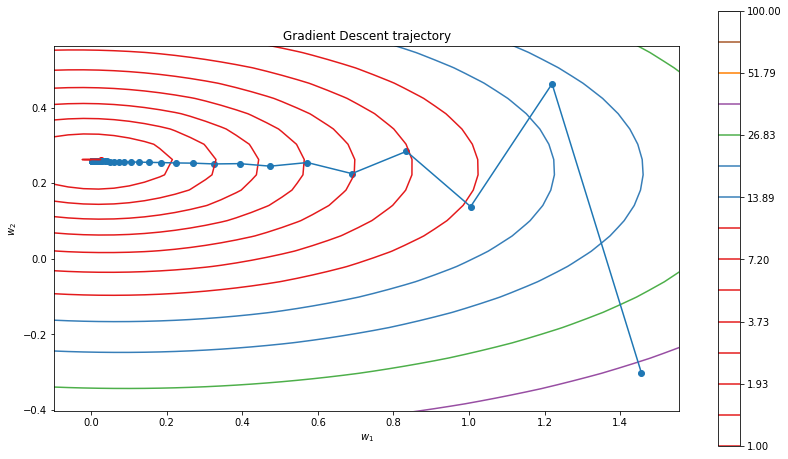

In [16]:
#Get levels
A, B = np.meshgrid(np.linspace(-2,2,100),np.linspace(-2,2,100))
levels = np.empty_like(A)

for i in range(A.shape[0]):
  for j in range(A.shape[1]):
    tmp = np.array([A[i, j],B[i, j]])
    levels[i,j] = np.mean(np.power(np.dot(X,tmp)- Y, 2))

plt.figure(figsize=(14,10))
plt.title('Gradient Descent trajectory')
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.xlim(w_list[:,0].min()- 0.1,w_list[:,0].max() + 0.1)
plt.ylim(w_list[:,1].min()- 0.1,w_list[:,1].max() + 0.1)
plt.gca().set_aspect('equal')

CS = plt.contour(A,B,levels,levels=np.logspace(0,2,num=15),cmap='Set1')
CB = plt.colorbar(CS,shrink=0.8,extend='both')

plt.scatter(w_true[0],w_true[1],c='r')
plt.scatter(w_list[:,0],w_list[:,1])
plt.plot(w_list[:,0],w_list[:,1])

plt.show()

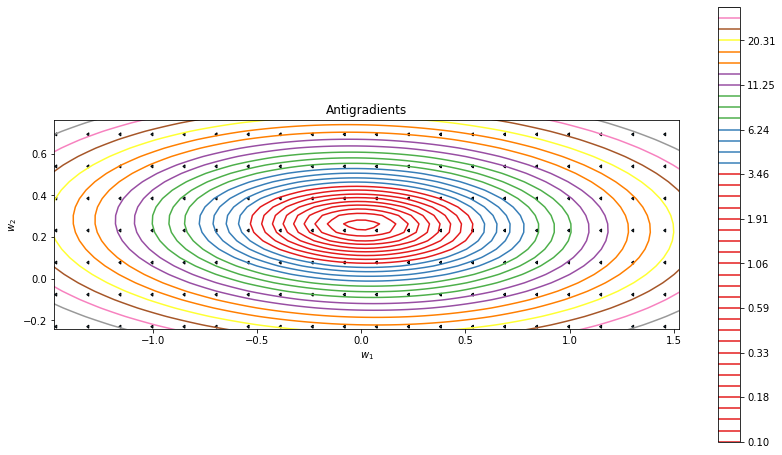

In [17]:
#Antigradient
A, B = np.meshgrid(np.linspace(-2,2,100),np.linspace(-2,2,100))
levels = np.empty_like(A)

for i in range(A.shape[0]):
  for j in range(A.shape[1]):
    tmp = np.array([A[i, j],B[i, j]])
    levels[i,j] = np.mean(np.power(np.dot(X,tmp)- Y, 2))

plt.figure(figsize=(14,10))
CS = plt.contour(A,B,levels,levels=np.logspace(-1,1.5,num=40),cmap='Set1')
CB = plt.colorbar(CS,shrink=0.8,extend='both')

A_mini, B_mini = np.meshgrid(np.linspace(-3,3,40),np.linspace(-3,3,40))
gradients = np.empty_like(A_mini)
for i in range(A_mini.shape[0]):
  for j in range(A_mini.shape[1]):
    tmp = np.array([A_mini[i, j],B_mini[i, j]])
    antigrad = -2 * 1e-3 * np.dot(X.T, np.dot(X,w) - Y) / Y.size
    plt.arrow(A_mini[i, j],B_mini[i, j],antigrad[0],antigrad[1],width=0.005, head_length=0.01)

plt.title('Antigradients')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')
plt.xlim((w_true[0]-1.5,w_true[0]+1.5))
plt.ylim((w_true[1]-.5,w_true[1]+.5))
plt.gca().set_aspect('equal')
plt.show()


In [18]:
#Stohastic Gradient Descent
np.random.seed(random_seed)
batch_size = 10
w = w_0.copy()
w_history_list = [w.copy()]
learning_rate = 1e-2

for i in range(n_steps):
  sample_indices = np.random.randint(n_obj,size=batch_size)
  w -= 2 * learning_rate * np.dot(X[sample_indices].T, np.dot(X[sample_indices],w) - Y[sample_indices])/ batch_size

  w_history_list.append(w.copy())
w_history_list = np.array(w_history_list)


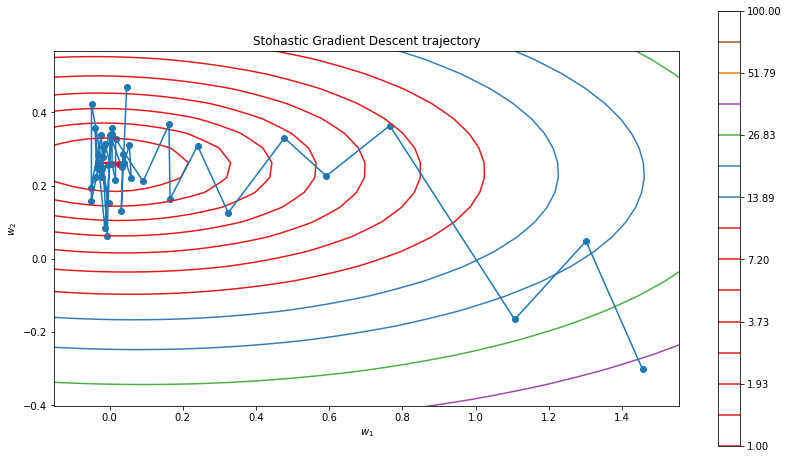

In [19]:
#Get levels
A, B = np.meshgrid(np.linspace(-2,2,100),np.linspace(-2,2,100))
levels = np.empty_like(A)

for i in range(A.shape[0]):
  for j in range(A.shape[1]):
    tmp = np.array([A[i, j],B[i, j]])
    levels[i,j] = np.mean(np.power(np.dot(X,tmp)- Y, 2))

plt.figure(figsize=(14,10))
plt.title('Stohastic Gradient Descent trajectory')
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.xlim(w_history_list[:,0].min()- 0.1,w_history_list[:,0].max() + 0.1)
plt.ylim(w_history_list[:,1].min()- 0.1,w_history_list[:,1].max() + 0.1)
plt.gca().set_aspect('equal')

CS = plt.contour(A,B,levels,levels=np.logspace(0,2,num=15),cmap='Set1')
CB = plt.colorbar(CS,shrink=0.8,extend='both')

plt.scatter(w_true[0],w_true[1],c='r')
plt.scatter(w_history_list[:,0],w_history_list[:,1])
plt.plot(w_history_list[:,0],w_history_list[:,1])

plt.show()

In [20]:
#SGD with steps satisfying Robbins-Monroe Conditions
np.random.seed(random_seed)
w = w_0.copy()
w_list = [w.copy()]
lr_0 = 0.02

for i in range(n_steps):
  lr = lr_0 / ((i+1) ** 0.51)
  sample_indices = np.random.randint(n_obj,size=batch_size)
  w -= 2 * lr * np.dot(X[sample_indices].T, np.dot(X[sample_indices],w) - Y[sample_indices])/ batch_size
  w_list.append(w.copy())
w_list = np.array(w_list)

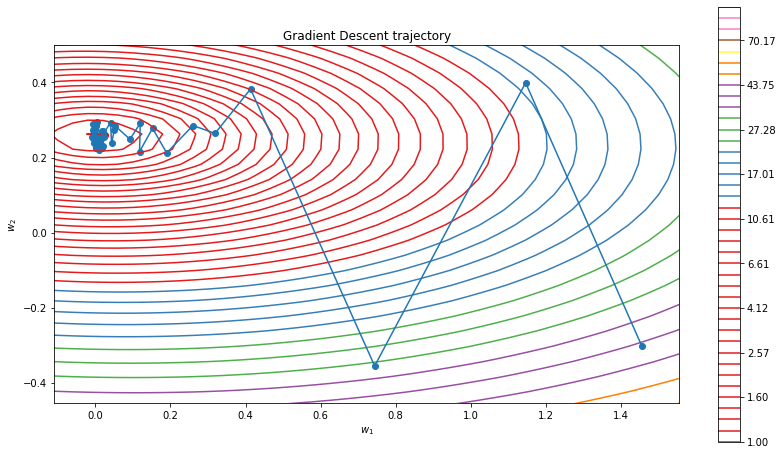

In [21]:
#Get levels
A, B = np.meshgrid(np.linspace(-2,2,100),np.linspace(-2,2,100))
levels = np.empty_like(A)

for i in range(A.shape[0]):
  for j in range(A.shape[1]):
    tmp = np.array([A[i, j],B[i, j]])
    levels[i,j] = np.mean(np.power(np.dot(X,tmp)- Y, 2))

plt.figure(figsize=(14,10))
plt.title('Gradient Descent trajectory')
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.xlim(w_list[:,0].min()- 0.1,w_list[:,0].max() + 0.1)
plt.ylim(w_list[:,1].min()- 0.1,w_list[:,1].max() + 0.1)
plt.gca().set_aspect('equal')

CS = plt.contour(A,B,levels,levels=np.logspace(0,2,num=40),cmap='Set1')
CB = plt.colorbar(CS,shrink=0.8,extend='both')

plt.scatter(w_true[0],w_true[1],c='r')
plt.scatter(w_list[:,0],w_list[:,1])
plt.plot(w_list[:,0],w_list[:,1])

plt.show()

In [22]:
#Comparing covergence speed
#data generation

n_features = 50
n_obj = 1000
batch_size = 10
n_steps = 200
np.random.seed(random_seed)

w_true = np.random.uniform(-2, 2, n_features)


X = np.random.uniform(-10, 10, (n_obj,n_features))
Y = X.dot(w_true) + np.random.normal(0,5,n_obj)


In [23]:
lr_sgd = 1e-3
lr_gd = 1e-3
w_sgd = np.random.uniform(-4, 4, n_features)
w_gd = w_sgd.copy()
residuals_sgd = [np.mean(np.power(np.dot(X,w_sgd)-Y,2))]
residuals_gd = [np.mean(np.power(np.dot(X,w_gd)-Y,2))]

for i in range(n_steps):
  lr = lr_sgd/ ((i+1) ** 0.51)
  sample = np.random.randint(n_obj,size=batch_size)
  w_sgd -= 2 * lr * np.dot(X[sample].T,np.dot(X[sample],w_sgd) - Y[sample]) / batch_size
  residuals_sgd.append(np.mean(np.power(np.dot(X, w_sgd) - Y, 2)))

  w_gd -= 2 * lr_gd * np.dot(X.T,np.dot(X,w_gd) - Y) / Y.shape[0]
  residuals_gd.append(np.mean(np.power(np.dot(X, w_gd) - Y, 2)))

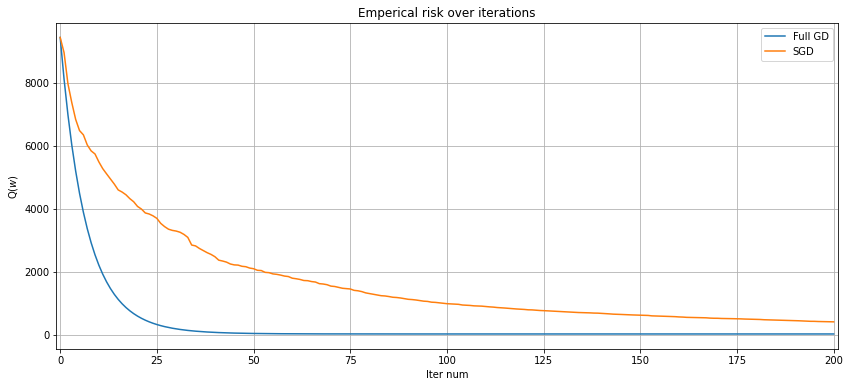

In [24]:
plt.figure(figsize=(14,6))
plt.plot(range(n_steps + 1), residuals_gd, label='Full GD')
plt.plot(range(n_steps + 1), residuals_sgd, label='SGD')
plt.title('Emperical risk over iterations')
plt.xlim((-1, n_steps + 1))
plt.legend()
plt.xlabel('Iter num')
plt.ylabel(r'Q($w$)')
plt.grid()
plt.show()

In [25]:
#Linear Regression out of the box
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [26]:
n_features = 700
n_obj = 100000
n_steps = 150

w_true = np.random.uniform(-2, 2, (n_features,1))

X = np.random.uniform(-100,100, (n_obj,n_features))
Y = X.dot(w_true) + np.random.normal(0,10,(n_obj,1))

In [27]:
%%time
lr = LinearRegression()
lr.fit(X,Y)
print(f'R2:{lr.score(X,Y)}')

R2:0.9999681798354724
CPU times: user 9.31 s, sys: 740 ms, total: 10.1 s
Wall time: 5.59 s


In [28]:
%%time
lr_with_L2_reg = Ridge(alpha=0.0, solver='sparse_cg')
lr_with_L2_reg.fit(X,Y)
print(f'R2:{lr_with_L2_reg.score(X,Y)}')

R2:0.9999678606420797
CPU times: user 874 ms, sys: 38.6 ms, total: 912 ms
Wall time: 578 ms


In [31]:
%%time
lr_with_L1_reg = Lasso(alpha=0.0)
lr_with_L1_reg.fit(X,Y)
print(f'R2:{lr_with_L1_reg.score(X,Y)}')

R2:0.9999681798354311
CPU times: user 1.2 s, sys: 83.9 ms, total: 1.28 s
Wall time: 898 ms
